# <p style="text-align: center;">EE 379K: Data Science Lab</p>
# <p style="text-align: center;">Lab 4 - 10/2/17</p>
## <p style="text-align: center;">Rachel Chen and Kevin Yee</p>
### <p style="text-align: center;"> rjc2737 and kjy252</p>

## Problem 1: PCA

<img src="Images/Problem1.png">

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
%matplotlib inline

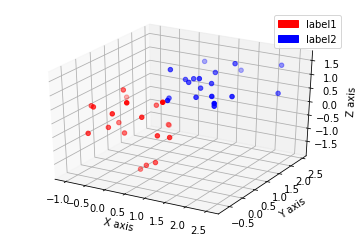

In [8]:
u1 = [0, 0, 0]
covMatrix1 = [[0.5, 0, 0], [0, 0.5, 0], [0, 0, 0.7]]

u2 = [1, 1, 1]
covMatrix2 = [[0.5, 0, 0], [0, 0.5, 0], [0, 0, 0.1]]

#generate 20 random points from a Gaussian multivariate distribution
x1, y1, z1 = np.random.multivariate_normal(u1, covMatrix1, 20).T
x2, y2, z2 = np.random.multivariate_normal(u2, covMatrix2, 20).T

matrix1 = np.column_stack((x1,y1,z1))
matrix2 = np.column_stack((x2,y2,z2))

#plot the 3D plot of the clouds of data points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, y1, z1, c='r', marker='o')
ax.scatter(x2, y2, z2, c='b', marker='o')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

red_patch = mpatches.Patch(color='red', label='label1')
blue_patch = mpatches.Patch(color='blue', label='label2')
plt.legend(handles=[red_patch, blue_patch])

plt.show()

The points look somewhat random and scattered, though the label1 points are clustered together as are the label2 points. Both groups of points look to be spread apart throughout the x axis and y axis with little dispersion through the z axis.

In [9]:
#concatenate all the points
x = np.append(x1,x2)
y = np.append(y1,y2)
z = np.append(z1,z2)

matrix = np.column_stack((x,y,z))

#find the covariance matrix:
mean = np.mean(matrix, axis=0)

#find the variances
varX = np.sum(np.square(matrix[:,0]-mean[0]))/len(matrix)
varY = np.sum(np.square(matrix[:,1]-mean[1]))/len(matrix)
varZ = np.sum(np.square(matrix[:,2]-mean[2]))/len(matrix)

#find the covariances
CovXY = np.sum((matrix[:,0]-mean[0]) * (matrix[:,1]-mean[1]))/len(matrix)
CovXZ = np.sum((matrix[:,0]-mean[0]) * (matrix[:,2]-mean[2]))/len(matrix)
CovYZ = np.sum((matrix[:,1]-mean[1]) * (matrix[:,2]-mean[2]))/len(matrix)

#put it all together
coMatrix = np.array([[varX, CovXY, CovXZ], [CovXY, varY, CovYZ], [CovXZ, CovYZ, varZ]])

print "The covariance matrix is"
print coMatrix

The covariance matrix is
[[ 0.75200198  0.29263822  0.36534495]
 [ 0.29263822  0.57664459  0.28020459]
 [ 0.36534495  0.28020459  0.73308964]]


In [10]:
from collections import OrderedDict

#find the eigenvectors of the covariance matrix with the largen eigenvalues

#make a dictionary of eigenvalues and their eigenvectors
dictEig = {}
matEig = np.linalg.eig(coMatrix)

for vec in range(len(matEig[0])):
    dictEig[matEig[0][vec]] = matEig[1][:, vec]
    
#sort dictionary
sortedDict = OrderedDict(sorted(dictEig.items(), key = lambda t: t[0], reverse = True))

#top 2 eigenvectors
e1 = sortedDict.values()[0]
e2 = sortedDict.values()[1]

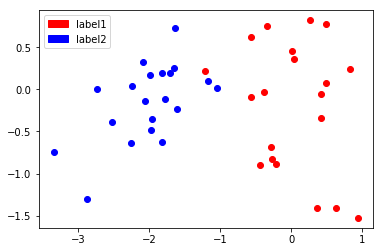

In [11]:
eigenv = np.column_stack((e1.T, e2.T))

#project data onto eigenvectors
proj1 = np.dot(matrix1, eigenv)
proj2 = np.dot(matrix2, eigenv)

newx1 = proj1[:, 0]
newy1 = proj1[:, 1]

newx2 = proj2[:, 0]
newy2 = proj2[:, 1]

#plot the porjected points
plt.plot(newx1, newy1, "o", c= 'r')
plt.plot(newx2, newy2, "o", c= 'b')

red_patch = mpatches.Patch(color='red', label='label1')
blue_patch = mpatches.Patch(color='blue', label='label2')
plt.legend(handles=[red_patch, blue_patch])

plt.show()

Yes, PCA did make is easier to distinguish the two labels in two dimensions. The variance of the points is clear in the x and y axes with the third dimension gone.

## Problem 2: Low Rank Approximation of Mona Lisa

<img src="Images/Problem2.png">

In [12]:
import scipy as sp
import pylab as pl
from scipy import misc
from scipy import linalg

In [13]:
mLisa = misc.imread("mona_lisa.png", flatten = True)

In [14]:
U, S, V = np.linalg.svd(mLisa, full_matrices = False)

In [15]:
def LRA(k):
    print "For rank %d" %(k)
    
    #resize U, S, V by the rank
    Ut = U[:, :k]
    St = S[:k]
    Vt = V[:k, :]
    
    #calculate low-rank approximation 
    At = Ut.dot(np.diag(St).dot(Vt))
    plt.imshow(At, cmap='gray')
    
    #calculate number of bits needed
    n = Ut.shape[0]
    p = Vt.shape[1]
    bits = 16 * ( k * (n + p + 1))
    print "Number of bits needed is %d" %(bits)

For rank 2
Number of bits needed is 32128


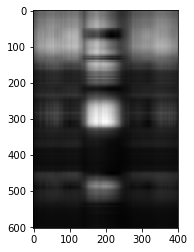

In [16]:
LRA(2)

For rank 5
Number of bits needed is 80320


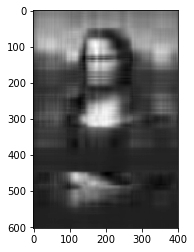

In [17]:
LRA(5)

For rank 10
Number of bits needed is 160640


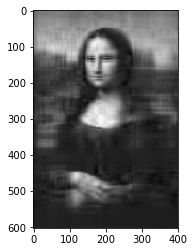

In [18]:
LRA(10)

## Problem 3: Using Low Rank Structure of Corrupted Entries

<img src="Images/Problem3.png">

In [41]:
from sklearn.decomposition import PCA as sklearnPCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
import sklearn

In [42]:
corrdata1 = pd.read_csv("CorrMat1.csv", header=None)
corrdata3 = pd.read_csv("CorrMat3.csv", header=None)

# doesn't tell us much?? #todo

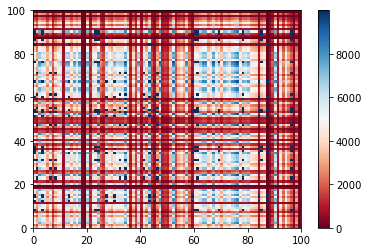

In [43]:
plt.pcolor(corrdata1,cmap='RdBu')
plt.colorbar()

## Inspect + Correct CorrMat1 with PCA


We will use the implementation of PCA from Problem 2, but with the SKLearn library. Because the first few dimensions capture the most variation, we will use k = 2 dimensions.

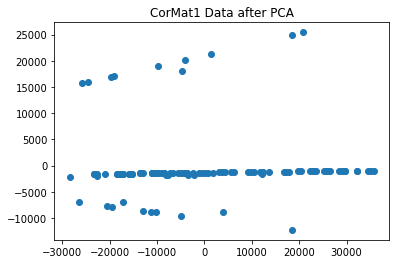

In [34]:
pca = sklearnPCA(n_components=2)
reduced_cd1 = pca.fit_transform(corrdata1)
plt.scatter(reduced_cd1[:,0], reduced_cd1[:,1])
plt.title("CorMat1 Data after PCA")
plt.show()

We recognize that there are values not on the main blue line. Those are our corrupted data. We will find these values and bring them closer to the others.
This is accomplished by finding the best fit line of the values that are "non corrupt". Then to correct the corrupted data, we will map the corrupted data points to that line.

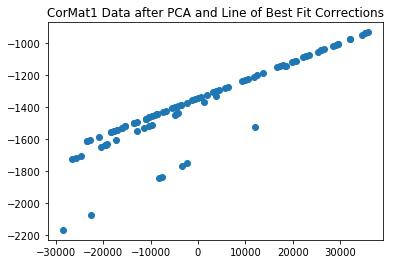

In [37]:
x = reduced_cd1[:,0]
y = reduced_cd1[:,1]

#separate good data from bad data
goodX = []
goodY =[]
    
for i in range(len(y)):
    if (y[i] < 15000 and y[i] > -5000):
        goodY.append(y[i])
        goodX.append(x[i])
            
#find the line of best fit based on good data            
fit = np.polyfit(goodX, goodY, 1)

#correct the bad data with the line of best fit equation
newY = []
for i in range(len(y)):
    if (y[i] > 15000 or y[i] < -5000):
        newY.append(x[i]*fit[0] + fit[1])
    else:
        newY.append(y[i])

plt.scatter(reduced_cd1[:,0], newY)
plt.title("CorMat1 Data after PCA and Line of Best Fit Corrections")
plt.show()

The above is the result of applying PCA (with  k = 2) and correcting the outliers with the line of best fit (of the non outlier points). Let's apply the best fit line again to the data for good measure.

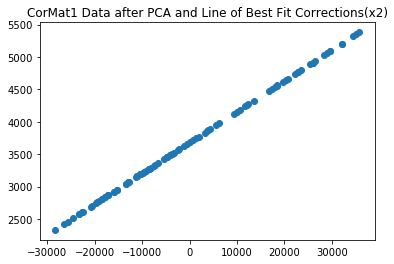

In [60]:
x = reduced_cd1[:,0]
y = newY
           
fit = np.polyfit(x, newY, 1)

#correct the data with the line of best fit equation
newY = []
for i in range(len(y)):
    newY.append(x[i]*fit[0] + fit[1])


plt.scatter(reduced_cd1[:,0], newY)
plt.title("CorMat1 Data after PCA and Line of Best Fit Corrections(x2)")
plt.show()

Great! The data seems to be clearly trending together after fitting again on the line of best fit.

## CorrMat3

Let's apply PCA like we did for the first dataset to see if there is best line of fit.

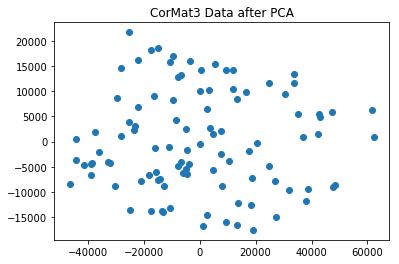

In [53]:
pca = sklearnPCA(n_components=2)
reduced_cd3 = pca.fit_transform(corrdata3)
plt.scatter(reduced_cd3[:,0], reduced_cd3[:,1])
plt.title("CorMat3 Data after PCA")
plt.show()

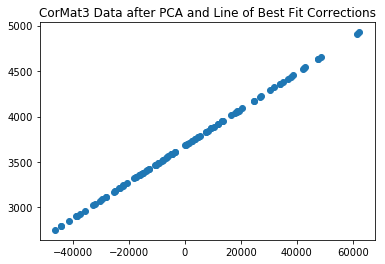

In [62]:
x = reduced_cd3[:,0]
y = newY
           
fit = np.polyfit(x, newY, 1)

#correct the data with the line of best fit equation
newY = []
for i in range(len(y)):
    newY.append(x[i]*fit[0] + fit[1])


plt.scatter(reduced_cd3[:,0], newY)
plt.title("CorMat3 Data after PCA and Line of Best Fit Corrections")
plt.show()

Nope, no clear trend. Let's use lag_plot to confirm that this data set is not random.
Random data should not exhibit any structure in the lag plot. Non-random structure implies that the underlying data are not random.

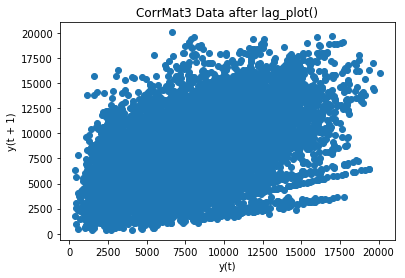

In [54]:
from pandas.plotting import lag_plot
plt.title("CorrMat3 Data after lag_plot()")
lag_plot(corrdata3)

There seems be a trend in the positive direction. Alright, let's dig for what the trend might be.

## Problem 4: Getting More into Kaggle

<img src="Images/Problem4.png">

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

%config InlineBackend.figure_format = 'png'
%matplotlib inline

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

all_data = pd.get_dummies(all_data)

#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

[From Lab 3 solution] We define a function to evaluate and compare different models using the root mean squared error (rmse) and a technique called Cross-Validation. This technique divides the trainset in k blocks (k=5 below). Then, it uses k-1 blocks for train and evaluates the model using the kth block. This procedure is repeated k times until every block has been used once as test.

CrossValidation serves as a way of proving model robustness as it shows it's sensibility to different training data. The average of the errors is the error reported and it is a way to see if the performance of the model was by chance (if in a particular test set the model performed very well it could be for some particularity of those observations)

In [66]:
#creating matrices for sklearn:

#Predictive models in sklearn receive feature observations for train, for evaluation (test) and labels for trainset
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice


#Import model functions
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet
from sklearn.model_selection import cross_val_score

# We define a function to evaluate and compare different models using the root mean squared error (rmse)

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

0.131361849894
0.05     0.138936
0.10     0.137775
0.30     0.135014
1.00     0.131362
3.00     0.128649
5.00     0.127822
10.00    0.127337
15.00    0.127529
dtype: float64


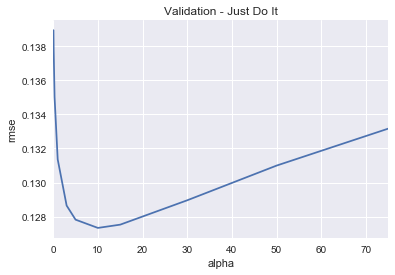

In [78]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

#for i in range(len(cv_ridge)):
 #   if cv_ridge[i]
print cv_ridge[1]
print cv_ridge[0:15]

In [67]:
# We train the model just for one alpha
alpha = 0.1
cv_ridge = rmse_cv(Ridge(alpha = alpha)).mean() 

In [68]:
# Error: 
print "RMSE: "
cv_ridge

RMSE: 


0.13777538277187856

In [69]:
#fit the model. Usually now you use the best alpha determined by CrossValidation
model_ridge = Ridge(alpha = alpha).fit(X_train,y)

#predict
ridge_preds = np.expm1(model_ridge.predict(X_test))

#Create file with predictions
solution = pd.DataFrame({"id":test.Id, "SalePrice":ridge_preds})
solution.to_csv("ridge_sol.csv", index = False)

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

model_ridge = Ridge()

alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

cv_ridge.min()

In [ ]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)

rmse_cv(model_lasso).mean()

In [ ]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

In [ ]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [ ]:
#let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()
Out[24]:

model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y)

xgb_preds = np.expm1(model_xgb.predict(X_test))
lasso_preds = np.expm1(model_lasso.predict(X_test))

predictions = pd.DataFrame({"xgb":xgb_preds, "lasso":lasso_preds})
predictions.plot(x = "xgb", y = "lasso", kind = "scatter")

preds = 0.7*lasso_preds + 0.3*xgb_preds

solution = pd.DataFrame({"id":test.Id, "SalePrice":preds})
solution.to_csv("ridge_sol.csv", index = False)